In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/MyDrive/spam.csv")
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data.shape

(5572, 2)

In [ ]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [ ]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["Message"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


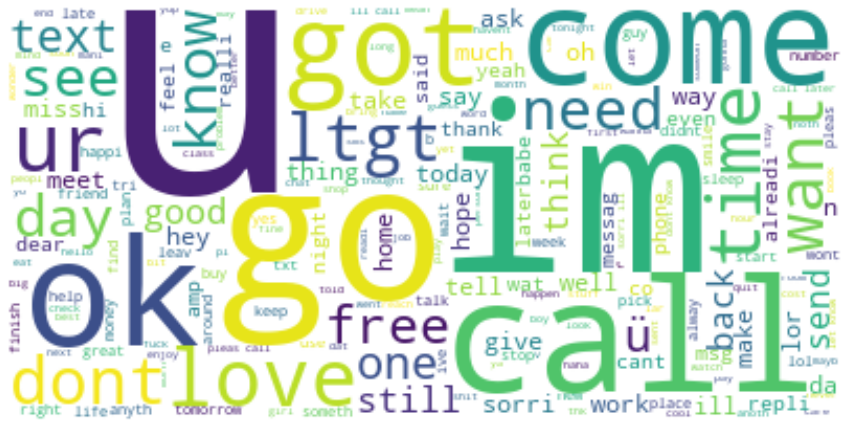

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
data.to_csv('cleaned_dataset.csv', index=False)

In [ ]:
pip install association-metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for association-metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3952 sha256=e84d9b84ce8baf1a47bbdc3d271db13922c1e566a2d1709105d320b2a411236c
  Stored in directory: /root/.cache/pip/wheels/b4/9c/17/2dccdebc4365f2a5a620485e89f8171e6a827ade4282cacac8
Successfully built association-metrics


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(data["Message"])
y = np.array(data["Category"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33,random_state=42)

In [ ]:

from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(xtrain, ytrain)

BernoulliNB()

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: rtuijbv
['ham']


In [ ]:
print(model.score(xtrain, ytrain))

0.9831234931690329


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
d2 = pd.read_csv('cleaned_dataset.csv')

In [ ]:
d2.head()

,Category,Message,text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts m...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


In [ ]:
d2['text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri  wkli comp win fa cup final tkts  m...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567     time tri  contact u u £ pound prize  claim ea...
5568                              ü b go esplanad fr home
5569                             piti  mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: text, Length: 5572, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(d2["Message"])
y = np.array(d2["Category"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33,random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(xtrain, ytrain)

MultinomialNB()

In [ ]:
y_pred= model.predict(xtest)  
x_pred= model.predict(xtrain)  

In [ ]:
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, y_pred)

array([[1573,   20],
       [  10,  236]])

In [ ]:
print(model.score(xtrain, ytrain))

0.9930350924189659


In [ ]:
print(model.score(xtest,ytest))

0.9836867862969005


In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: 4567rgnn
['ham']


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: yuiopp
['ham']


In [ ]:
model.score(xtrain,ytrain)*100

100.0

In [ ]:
model.score(xtest,ytest)*100

96.95486677542142

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

RandomForestClassifier()

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: 789hgfd
['ham']


In [ ]:
model.score(xtrain,ytrain)*100

100.0

In [ ]:
model.score(xtest,ytest)*100

98.04241435562805

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(xtrain, ytrain)

KNeighborsClassifier()

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: 6789jhgfd
['ham']


In [ ]:
model.score(xtrain,ytrain)*100

92.39217787302437

In [ ]:
model.score(xtest,ytest)*100

91.40837411636758

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(xtrain, ytrain)

AdaBoostClassifier()

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: weid34
['ham']


In [ ]:
model.score(xtrain,ytrain)*100


97.91052772568979

In [ ]:
model.score(xtest,ytest)*100

97.11799891245242

In [ ]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()
model.fit(xtrain, ytrain)

BaggingClassifier()

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: 5789
['ham']


In [ ]:
model.score(xtrain,ytrain)*100

99.6785427270292

In [ ]:
model.score(xtest,ytest)*100

97.06362153344209

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(xtrain, ytrain)

SVC()

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: 899jgd
['ham']


In [ ]:
model.score(xtrain,ytrain)*100

99.5713903027056

In [ ]:
model.score(xtest,ytest)*100

98.09679173463839

In [ ]:
d2["Category"] = d2.Category.replace(["spam","ham"],[1,0])
print(d2.head())

   Category                                            Message  \
0         0  Go until jurong point, crazy.. Available only ...   
1         0                      Ok lar... Joking wif u oni...   
2         1  Free entry in 2 a wkly comp to win FA Cup fina...   
3         0  U dun say so early hor... U c already then say...   
4         0  Nah I don't think he goes to usf, he lives aro...   

                                                text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri  wkli comp win fa cup final tkts  m...  
3                u dun say earli hor u c alreadi say  
4          nah dont think goe usf live around though  


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(d2["Message"])
y = np.array(d2["Category"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33,random_state=42)

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(xtrain, ytrain)

MultinomialNB()

In [ ]:
y_pred= model.predict(xtest)  
x_pred= model.predict(xtrain) 

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

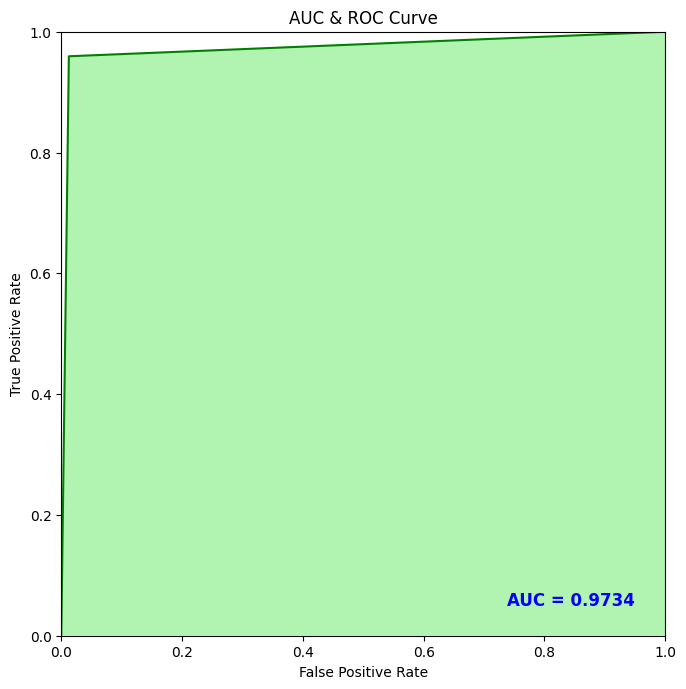

In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(ytest,y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(ytest,y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


In [ ]:
#Evaluate the model on the training data set
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
k_fold=KFold(n_splits=25,random_state=None)
score=cross_val_score(model,X,y,cv=k_fold)
acc=accuracy_score(y_pred,ytest)
print("Score:",acc)
confusion_matrix(ytest,y_pred)

Score: 0.9836867862969005


array([[1573,   20],
       [  10,  236]])